In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("dataset_traffic_accident_prediction1.csv")

In [3]:
df.head(5)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [4]:
df.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [5]:
df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [7]:
df.drop(['Accident_Severity', 'Road_Light_Condition'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weather             798 non-null    object 
 1   Road_Type           798 non-null    object 
 2   Time_of_Day         798 non-null    object 
 3   Traffic_Density     798 non-null    float64
 4   Speed_Limit         798 non-null    float64
 5   Number_of_Vehicles  798 non-null    float64
 6   Driver_Alcohol      798 non-null    float64
 7   Road_Condition      798 non-null    object 
 8   Vehicle_Type        798 non-null    object 
 9   Driver_Age          798 non-null    float64
 10  Driver_Experience   798 non-null    float64
 11  Accident            798 non-null    float64
dtypes: float64(7), object(5)
memory usage: 78.9+ KB


In [9]:
df['Driver_Alcohol'].fillna(df['Driver_Alcohol'].mean(), inplace=True)


C:\Users\abhis\AppData\Local\Temp\ipykernel_17052\550520703.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Driver_Alcohol'].fillna(df['Driver_Alcohol'].mean(), inplace=True)


In [10]:
df.isnull().sum()

Weather               42
Road_Type             42
Time_of_Day           42
Traffic_Density       42
Speed_Limit           42
Number_of_Vehicles    42
Driver_Alcohol         0
Road_Condition        42
Vehicle_Type          42
Driver_Age            42
Driver_Experience     42
Accident              42
dtype: int64

In [11]:
df['Weather'].value_counts()

Weather
Clear     334
Rainy     230
Foggy     107
Snowy      87
Stormy     40
Name: count, dtype: int64

In [12]:
df['Weather'] = df['Weather'].replace({'Clear': 0, 'Rainy': 1, 'Foggy': 2, 'Snowy': 3, 'Stormy':4})

# Now convert the column to float
df['Weather'] = df['Weather'].astype(float)
print(df['Weather'].dtype)
print(df['Weather'].head())

float64
0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Weather, dtype: float64


C:\Users\abhis\AppData\Local\Temp\ipykernel_17052\2651321784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Weather'] = df['Weather'].replace({'Clear': 0, 'Rainy': 1, 'Foggy': 2, 'Snowy': 3, 'Stormy':4})


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weather             798 non-null    float64
 1   Road_Type           798 non-null    object 
 2   Time_of_Day         798 non-null    object 
 3   Traffic_Density     798 non-null    float64
 4   Speed_Limit         798 non-null    float64
 5   Number_of_Vehicles  798 non-null    float64
 6   Driver_Alcohol      840 non-null    float64
 7   Road_Condition      798 non-null    object 
 8   Vehicle_Type        798 non-null    object 
 9   Driver_Age          798 non-null    float64
 10  Driver_Experience   798 non-null    float64
 11  Accident            798 non-null    float64
dtypes: float64(8), object(4)
memory usage: 78.9+ KB


In [14]:
df['Weather'].fillna(df['Weather'].mean(), inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_17052\1117419639.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna(df['Weather'].mean(), inplace=True)


In [15]:
df.isnull().sum()

Weather                0
Road_Type             42
Time_of_Day           42
Traffic_Density       42
Speed_Limit           42
Number_of_Vehicles    42
Driver_Alcohol         0
Road_Condition        42
Vehicle_Type          42
Driver_Age            42
Driver_Experience     42
Accident              42
dtype: int64

In [16]:
df['Road_Type'].value_counts()

Road_Type
Highway          402
City Road        230
Rural Road       125
Mountain Road     41
Name: count, dtype: int64

In [17]:
df['Road_Type'] = df['Road_Type'].replace({'Highway': 0, 'City Road': 1, 'Rural Road': 2, 'Snowy': 3, 'Mountain Road':4})

# Now convert the column to float
df['Road_Type'] = df['Road_Type'].astype(float)
print(df['Road_Type'].dtype)
print(df['Road_Type'].head())

float64
0    1.0
1    2.0
2    0.0
3    1.0
4    0.0
Name: Road_Type, dtype: float64


C:\Users\abhis\AppData\Local\Temp\ipykernel_17052\2075737491.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Road_Type'] = df['Road_Type'].replace({'Highway': 0, 'City Road': 1, 'Rural Road': 2, 'Snowy': 3, 'Mountain Road':4})


In [18]:
df['Road_Type'].fillna(df['Road_Type'].mean(), inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_17052\594479603.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Road_Type'].fillna(df['Road_Type'].mean(), inplace=True)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weather             840 non-null    float64
 1   Road_Type           840 non-null    float64
 2   Time_of_Day         798 non-null    object 
 3   Traffic_Density     798 non-null    float64
 4   Speed_Limit         798 non-null    float64
 5   Number_of_Vehicles  798 non-null    float64
 6   Driver_Alcohol      840 non-null    float64
 7   Road_Condition      798 non-null    object 
 8   Vehicle_Type        798 non-null    object 
 9   Driver_Age          798 non-null    float64
 10  Driver_Experience   798 non-null    float64
 11  Accident            798 non-null    float64
dtypes: float64(9), object(3)
memory usage: 78.9+ KB


In [20]:
df['Time_of_Day'].value_counts()

Time_of_Day
Afternoon    272
Evening      218
Morning      201
Night        107
Name: count, dtype: int64

In [21]:
df['Time_of_Day'] = df['Time_of_Day'].replace({'Afternoon': 0, 'Evening': 1, 'Morning': 2, 'Night': 3})

# Now convert the column to float
df['Time_of_Day'] = df['Time_of_Day'].astype(float)
print(df['Time_of_Day'].dtype)
print(df['Time_of_Day'].head())

float64
0    2.0
1    3.0
2    1.0
3    0.0
4    2.0
Name: Time_of_Day, dtype: float64


C:\Users\abhis\AppData\Local\Temp\ipykernel_17052\1586292133.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Time_of_Day'] = df['Time_of_Day'].replace({'Afternoon': 0, 'Evening': 1, 'Morning': 2, 'Night': 3})


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weather             840 non-null    float64
 1   Road_Type           840 non-null    float64
 2   Time_of_Day         798 non-null    float64
 3   Traffic_Density     798 non-null    float64
 4   Speed_Limit         798 non-null    float64
 5   Number_of_Vehicles  798 non-null    float64
 6   Driver_Alcohol      840 non-null    float64
 7   Road_Condition      798 non-null    object 
 8   Vehicle_Type        798 non-null    object 
 9   Driver_Age          798 non-null    float64
 10  Driver_Experience   798 non-null    float64
 11  Accident            798 non-null    float64
dtypes: float64(10), object(2)
memory usage: 78.9+ KB


In [23]:
df['Time_of_Day'].fillna(df['Time_of_Day'].mean(), inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_17052\223503506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_of_Day'].fillna(df['Time_of_Day'].mean(), inplace=True)


In [24]:
df['Road_Condition'] = df['Road_Condition'].replace({'Dry': 0, 'Icy': 1, 'Wet': 2, 'Under Construction': 3})

# Now convert the column to float
df['Road_Condition'] = df['Road_Condition'].astype(float)
print(df['Road_Condition'].dtype)
print(df['Road_Condition'].head())

float64
0    2.0
1    2.0
2    1.0
3    3.0
4    0.0
Name: Road_Condition, dtype: float64


C:\Users\abhis\AppData\Local\Temp\ipykernel_17052\4203452622.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Road_Condition'] = df['Road_Condition'].replace({'Dry': 0, 'Icy': 1, 'Wet': 2, 'Under Construction': 3})


In [25]:
df['Road_Condition'].value_counts()

Road_Condition
0.0    400
1.0    154
2.0    153
3.0     91
Name: count, dtype: int64

In [26]:
df['Road_Condition'].fillna(df['Road_Condition'].mean(), inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_17052\3369191556.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Road_Condition'].fillna(df['Road_Condition'].mean(), inplace=True)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weather             840 non-null    float64
 1   Road_Type           840 non-null    float64
 2   Time_of_Day         840 non-null    float64
 3   Traffic_Density     798 non-null    float64
 4   Speed_Limit         798 non-null    float64
 5   Number_of_Vehicles  798 non-null    float64
 6   Driver_Alcohol      840 non-null    float64
 7   Road_Condition      840 non-null    float64
 8   Vehicle_Type        798 non-null    object 
 9   Driver_Age          798 non-null    float64
 10  Driver_Experience   798 non-null    float64
 11  Accident            798 non-null    float64
dtypes: float64(11), object(1)
memory usage: 78.9+ KB


In [28]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Car           589
Truck          99
Motorcycle     86
Bus            24
Name: count, dtype: int64

In [29]:
df['Vehicle_Type'] = df['Vehicle_Type'].replace({'Car': 0, 'Truck': 1, 'Motorcycle': 2, 'Bus': 3})

# Now convert the column to float
df['Vehicle_Type'] = df['Vehicle_Type'].astype(float)
print(df['Vehicle_Type'].dtype)
print(df['Vehicle_Type'].head())

float64
0    0.0
1    1.0
2    0.0
3    3.0
4    0.0
Name: Vehicle_Type, dtype: float64


C:\Users\abhis\AppData\Local\Temp\ipykernel_17052\1148738470.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Vehicle_Type'] = df['Vehicle_Type'].replace({'Car': 0, 'Truck': 1, 'Motorcycle': 2, 'Bus': 3})


In [30]:
df['Vehicle_Type'].fillna(df['Vehicle_Type'].mean(), inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_17052\2391246267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vehicle_Type'].fillna(df['Vehicle_Type'].mean(), inplace=True)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weather             840 non-null    float64
 1   Road_Type           840 non-null    float64
 2   Time_of_Day         840 non-null    float64
 3   Traffic_Density     798 non-null    float64
 4   Speed_Limit         798 non-null    float64
 5   Number_of_Vehicles  798 non-null    float64
 6   Driver_Alcohol      840 non-null    float64
 7   Road_Condition      840 non-null    float64
 8   Vehicle_Type        840 non-null    float64
 9   Driver_Age          798 non-null    float64
 10  Driver_Experience   798 non-null    float64
 11  Accident            798 non-null    float64
dtypes: float64(12)
memory usage: 78.9 KB


In [32]:
df.isnull().sum()

Weather                0
Road_Type              0
Time_of_Day            0
Traffic_Density       42
Speed_Limit           42
Number_of_Vehicles    42
Driver_Alcohol         0
Road_Condition         0
Vehicle_Type           0
Driver_Age            42
Driver_Experience     42
Accident              42
dtype: int64

In [33]:
df['Traffic_Density'].fillna(df['Traffic_Density'].mean(), inplace=True)
df['Speed_Limit'].fillna(df['Speed_Limit'].mean(), inplace=True)
df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mean(), inplace=True)
df['Driver_Age'].fillna(df['Driver_Age'].mean(), inplace=True)
df['Driver_Experience'].fillna(df['Driver_Experience'].mean(), inplace=True)
df['Accident'].fillna(df['Accident'].mean(), inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_17052\3856223342.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Traffic_Density'].fillna(df['Traffic_Density'].mean(), inplace=True)
C:\Users\abhis\AppData\Local\Temp\ipykernel_17052\3856223342.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [34]:
df.isnull().sum()

Weather               0
Road_Type             0
Time_of_Day           0
Traffic_Density       0
Speed_Limit           0
Number_of_Vehicles    0
Driver_Alcohol        0
Road_Condition        0
Vehicle_Type          0
Driver_Age            0
Driver_Experience     0
Accident              0
dtype: int64

In [35]:
df = df.drop_duplicates()


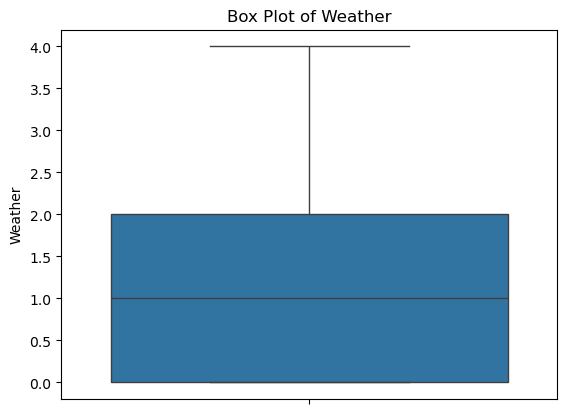

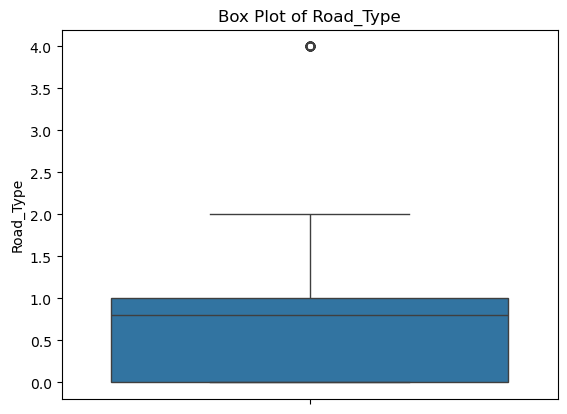

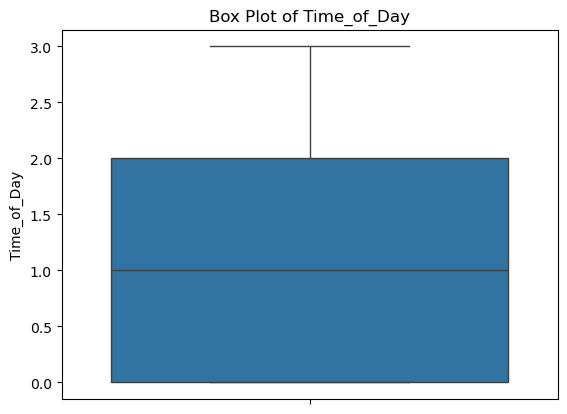

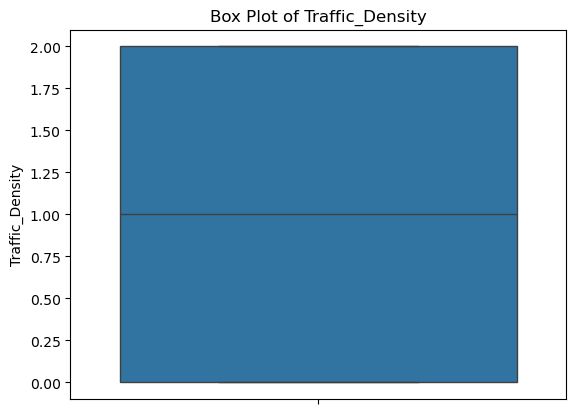

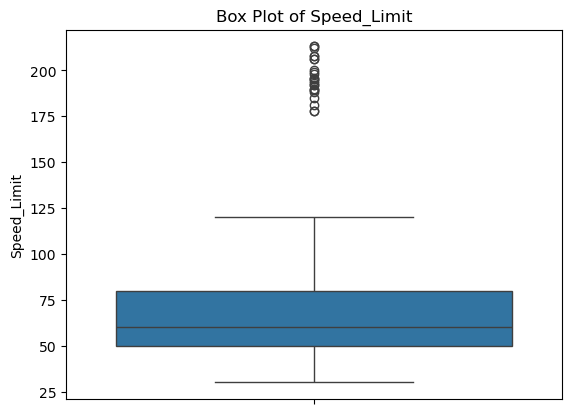

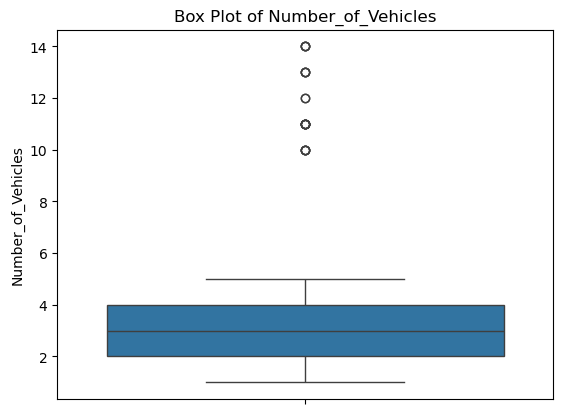

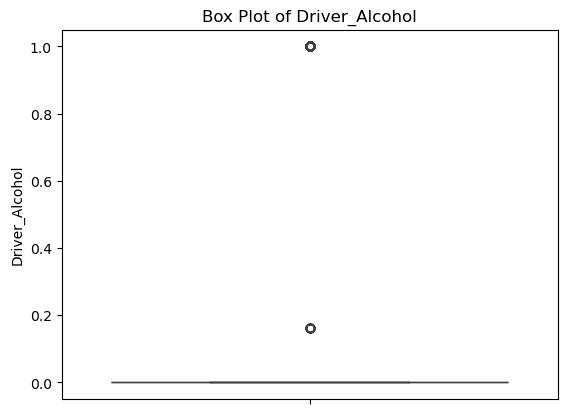

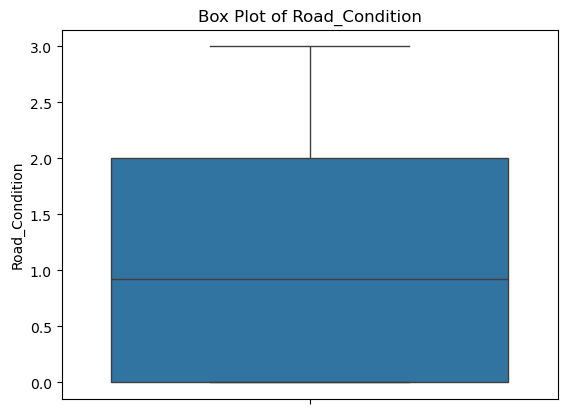

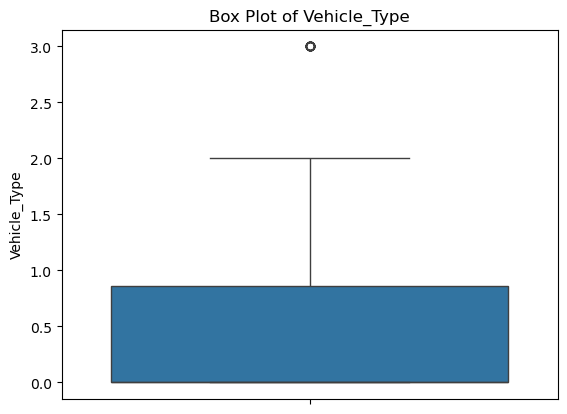

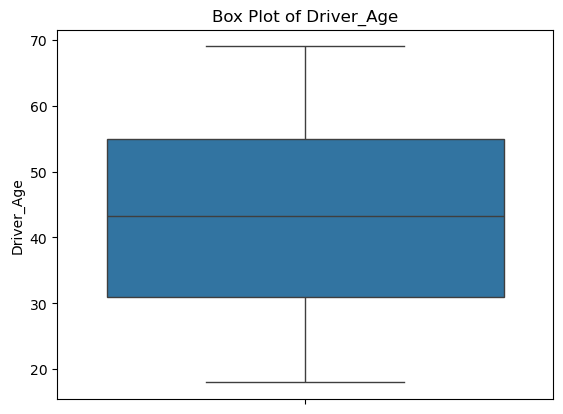

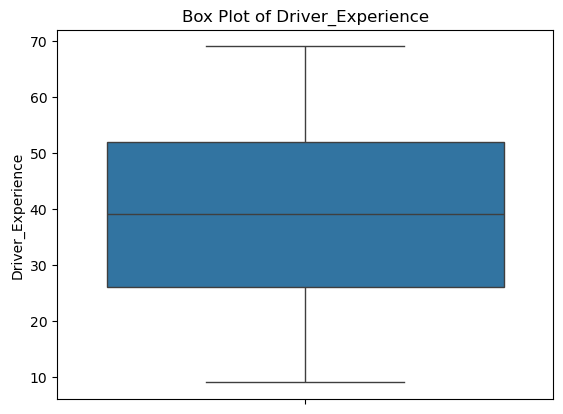

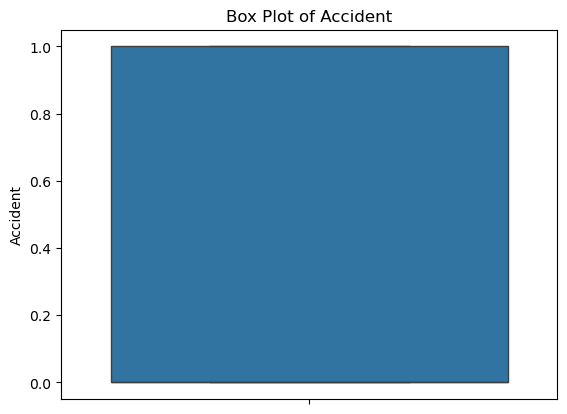

In [36]:
for col in df.columns:
    if df[col].dtype != 'object':
        plt.figure()
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

In [37]:
Q1 = df['Speed_Limit'].quantile(0.25)
Q3 = df['Speed_Limit'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df_filtered = df[(df['Speed_Limit'] >= lower_bound) & (df['Speed_Limit'] <= upper_bound)]

print(df_filtered.shape) 


(801, 12)


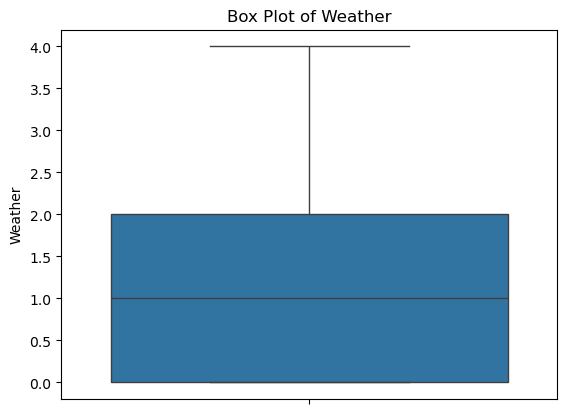

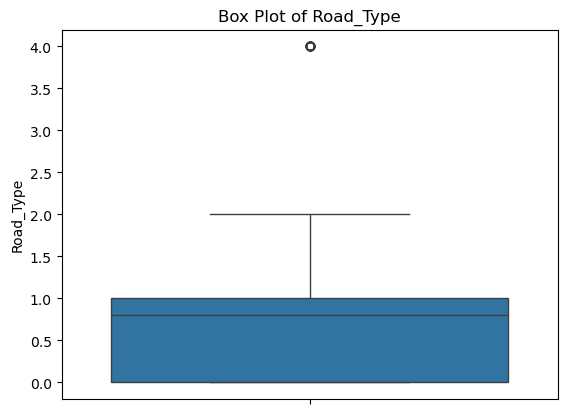

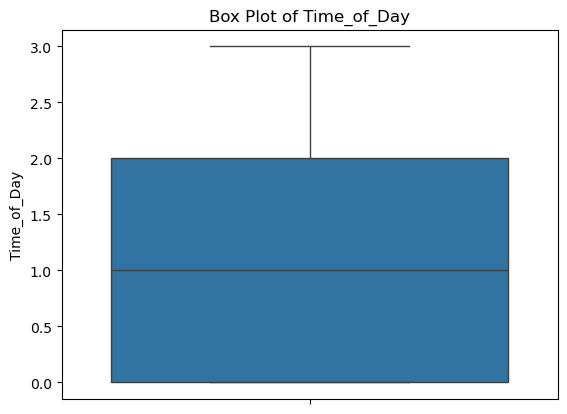

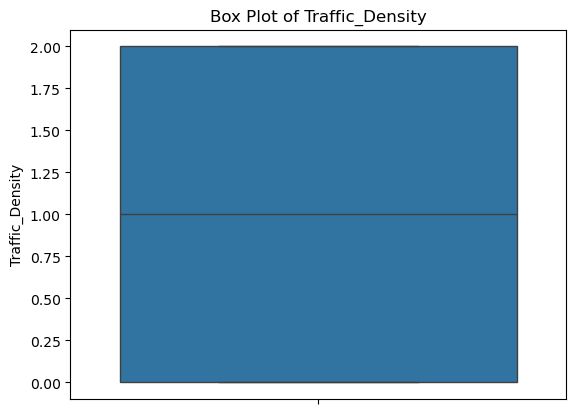

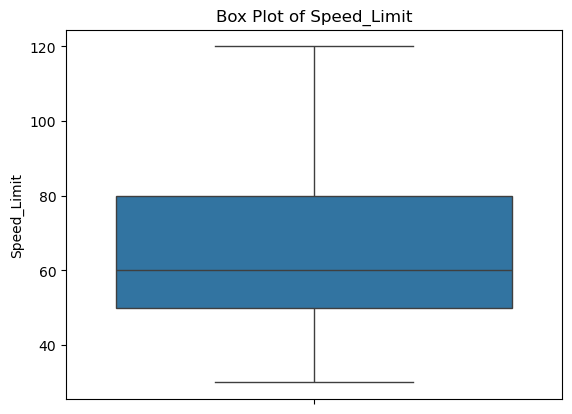

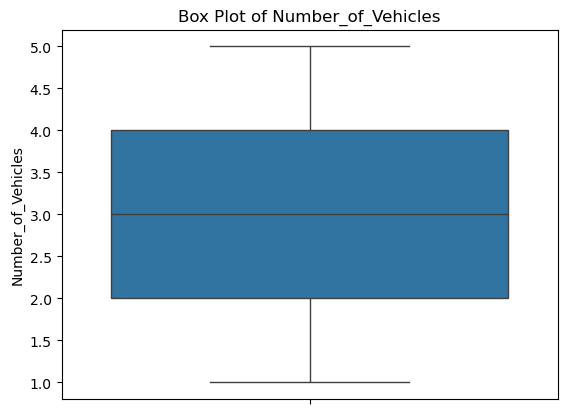

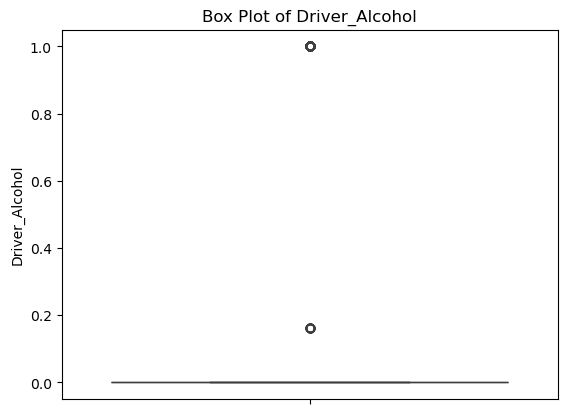

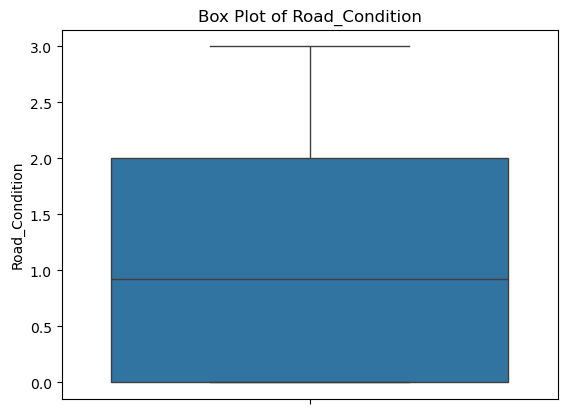

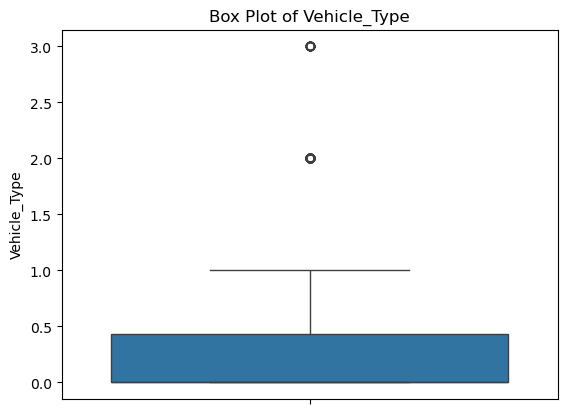

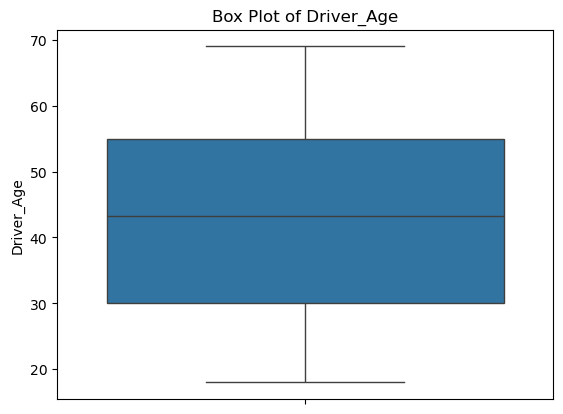

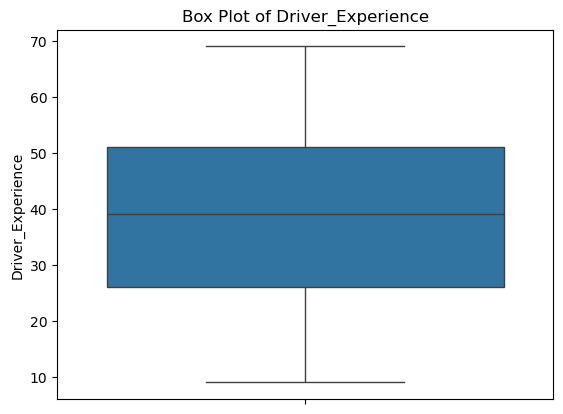

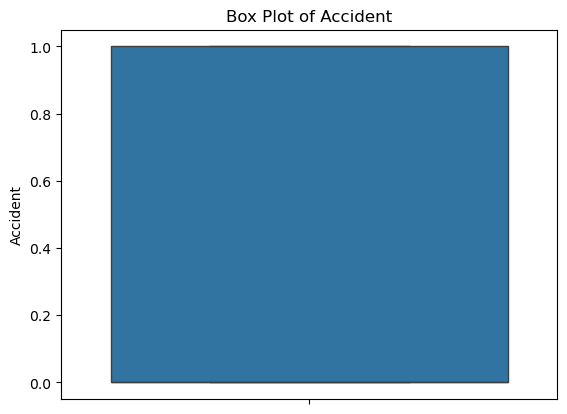

In [38]:
for col in df_filtered.columns:
    if df_filtered[col].dtype != 'object':
        plt.figure()
        sns.boxplot(y=df_filtered[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

In [39]:
x=df_filtered.iloc[:, :-1]
y=df_filtered.iloc[:, -1]

In [40]:
x

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience
0,1.0,1.0,2.0,1.000000,100.0,5.0,0.0,2.000000,0.0,51.000000,48.0
1,0.0,2.0,3.0,1.001253,120.0,3.0,0.0,2.000000,1.0,49.000000,43.0
2,1.0,0.0,1.0,1.000000,60.0,4.0,0.0,1.000000,0.0,54.000000,52.0
3,0.0,1.0,0.0,2.000000,60.0,3.0,0.0,3.000000,3.0,34.000000,31.0
5,0.0,2.0,3.0,0.000000,120.0,3.0,0.0,0.918546,1.0,49.000000,43.0
...,...,...,...,...,...,...,...,...,...,...,...
835,0.0,0.0,3.0,2.000000,30.0,4.0,0.0,0.000000,0.0,23.000000,15.0
836,1.0,2.0,1.0,2.000000,60.0,4.0,0.0,0.000000,2.0,52.000000,46.0
837,2.0,0.0,1.0,1.001253,30.0,4.0,1.0,0.000000,0.0,43.259398,34.0
838,2.0,0.0,0.0,2.000000,60.0,3.0,0.0,0.000000,0.0,25.000000,19.0


In [41]:
y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
5      0.000000
         ...   
835    0.000000
836    1.000000
837    0.299499
838    0.000000
839    0.000000
Name: Accident, Length: 801, dtype: float64

In [42]:
df['Accident'].value_counts()

Accident
0.000000    550
1.000000    234
0.299499     42
Name: count, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [44]:
x_train

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience
546,2.0,0.807018,2.000000,0.000000,30.0,3.0,0.0,1.0,0.0,21.000000,19.0
786,3.0,0.807018,1.179198,0.000000,80.0,2.0,0.0,3.0,0.0,35.000000,29.0
444,2.0,0.000000,1.000000,0.000000,50.0,3.0,0.0,0.0,0.0,64.000000,62.0
42,2.0,0.000000,3.000000,0.000000,60.0,5.0,0.0,0.0,0.0,69.000000,63.0
516,1.0,0.000000,1.000000,1.000000,100.0,4.0,1.0,2.0,0.0,43.259398,40.0
...,...,...,...,...,...,...,...,...,...,...,...
74,3.0,0.000000,2.000000,2.000000,60.0,4.0,0.0,2.0,0.0,50.000000,43.0
110,1.0,1.000000,0.000000,1.000000,60.0,2.0,0.0,0.0,2.0,21.000000,19.0
283,1.0,0.000000,0.000000,0.000000,80.0,5.0,0.0,0.0,2.0,24.000000,23.0
454,0.0,2.000000,1.000000,1.001253,80.0,5.0,0.0,3.0,0.0,59.000000,54.0


In [45]:
y_train

546    1.0
786    1.0
444    0.0
42     0.0
516    0.0
      ... 
74     1.0
110    0.0
283    0.0
454    0.0
106    0.0
Name: Accident, Length: 560, dtype: float64

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
treemodel=DecisionTreeClassifier(max_depth=4)

In [48]:
y_train = y_train.apply(lambda x: 1 if x >= 0.5 else 0)


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)


In [50]:
treemodel.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4)

In [51]:
from sklearn import tree

[Text(0.4375, 0.9, 'x[9] <= 26.5\ngini = 0.394\nsamples = 560\nvalue = [409, 151]'),
 Text(0.25, 0.7, 'x[4] <= 90.0\ngini = 0.289\nsamples = 97\nvalue = [80, 17]'),
 Text(0.2, 0.5, 'x[3] <= 1.501\ngini = 0.326\nsamples = 83\nvalue = [66, 17]'),
 Text(0.1, 0.3, 'x[8] <= 2.5\ngini = 0.262\nsamples = 58\nvalue = [49, 9]'),
 Text(0.05, 0.1, 'gini = 0.241\nsamples = 57\nvalue = [49, 8]'),
 Text(0.15, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.3, 'x[8] <= 0.215\ngini = 0.435\nsamples = 25\nvalue = [17, 8]'),
 Text(0.25, 0.1, 'gini = 0.494\nsamples = 18\nvalue = [10, 8]'),
 Text(0.35, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.625, 0.7, 'x[9] <= 28.5\ngini = 0.411\nsamples = 463\nvalue = [329, 134]'),
 Text(0.45, 0.5, 'x[5] <= 1.5\ngini = 0.463\nsamples = 22\nvalue = [8, 14]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5, 0.3, 'x[3] <= 1.5\ngini = 0.388\nsamples = 19\nvalue

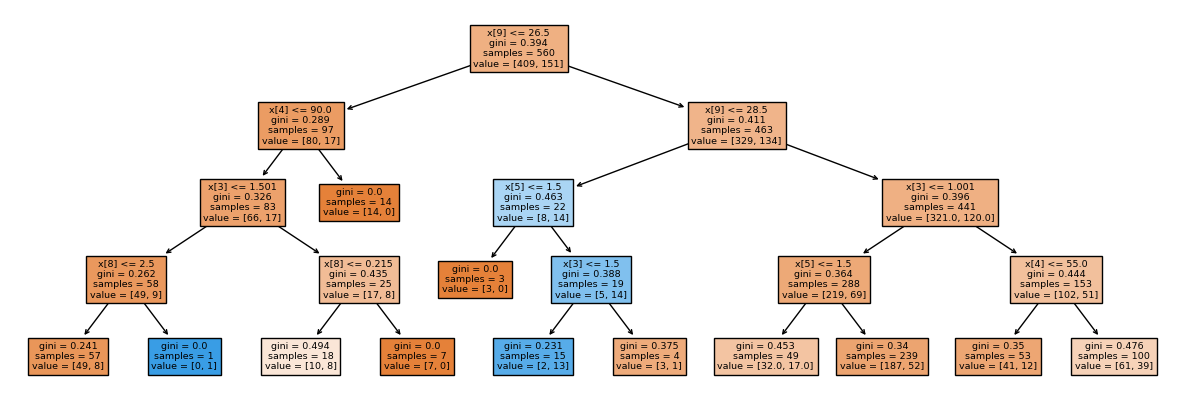

In [52]:
from sklearn import tree
plt.figure(figsize=(15,5))
tree.plot_tree(treemodel, filled=True)

In [67]:
y_pred=treemodel.predict(x_test)

In [54]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score, classification_report

In [81]:
score=accuracy_score(y_pred, y_test)
print(score)


0.6721991701244814


In [57]:

y_train = np.where(y_train >= 0.5, 1, 0)
y_test = np.where(y_test >= 0.5, 1, 0)


In [59]:
treemodel.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4)